# STAT4060J Homework 2

## Preparation Work

In [148]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import Data and Clean Data

In [149]:
df = pd.read_csv("LAhousingpricesaug2013.txt",sep='\s+')
df

,CommunityName,ZIPCode,SalesofSingleFamilyHomes,PriceMedianSFR(1000),PriceChgfromAugust2012,SalesCountCondos,PriceMedianCondos(1000),PriceChgfromAug2012,MedianHomePrice/Sq.Ft
0,Acton,93510,6.0,510.0,34.2,1.0,184.0,NaN,173.0
1,AgouraHills,91301,16.0,893.0,15.9,24.0,530.0,20.9,323.0
2,Alhambra,91801,16.0,578.0,28.7,19.0,385.0,0.5,418.0
3,Alhambra,91803,18.0,460.0,10.0,2.0,331.0,-18.6,353.0
4,Altadena,91001,45.0,630.0,50.0,1.0,1300.0,19.5,444.0
...,...,...,...,...,...,...,...,...,...
264,Whittier,90606,22.0,329.0,14.2,NaN,NaN,NaN,289.0
265,Wilmington,90744,19.0,277.0,19.4,1.0,246.0,NaN,245.0
266,Winnetka,91306,39.0,418.0,29.8,11.0,225.0,56.2,277.0
267,WoodlndHls,91364,41.0,675.0,32.4,1.0,275.0,32.5,332.0


In [150]:
df.dropna(axis=0, how='any', inplace= True, subset=[
    'SalesofSingleFamilyHomes',
    'PriceMedianSFR(1000)',
    'PriceMedianCondos(1000)',
    'MedianHomePrice/Sq.Ft'
])
df

,CommunityName,ZIPCode,SalesofSingleFamilyHomes,PriceMedianSFR(1000),PriceChgfromAugust2012,SalesCountCondos,PriceMedianCondos(1000),PriceChgfromAug2012,MedianHomePrice/Sq.Ft
0,Acton,93510,6.0,510.0,34.2,1.0,184.0,NaN,173.0
1,AgouraHills,91301,16.0,893.0,15.9,24.0,530.0,20.9,323.0
2,Alhambra,91801,16.0,578.0,28.7,19.0,385.0,0.5,418.0
3,Alhambra,91803,18.0,460.0,10.0,2.0,331.0,-18.6,353.0
4,Altadena,91001,45.0,630.0,50.0,1.0,1300.0,19.5,444.0
...,...,...,...,...,...,...,...,...,...
263,Whittier,90605,31.0,370.0,15.6,2.0,355.0,153.6,296.0
265,Wilmington,90744,19.0,277.0,19.4,1.0,246.0,NaN,245.0
266,Winnetka,91306,39.0,418.0,29.8,11.0,225.0,56.2,277.0
267,WoodlndHls,91364,41.0,675.0,32.4,1.0,275.0,32.5,332.0


### 2. Perform regression of Y on X = {X1,X2,X3}, and compute parameter estimatess

In [151]:
Y = df['SalesofSingleFamilyHomes'].values
Y = np.expand_dims(Y,axis = 1)
X0 = np.ones((len(Y),1))
X1 = np.array(df['PriceMedianSFR(1000)'])
X2 = np.array(df['PriceMedianCondos(1000)'])
X3 = np.array(df['MedianHomePrice/Sq.Ft'])
X_mat = df[['PriceMedianSFR(1000)','PriceMedianCondos(1000)','MedianHomePrice/Sq.Ft']]
X = X_mat.values
X = np.hstack((X0,X))
Y.shape

(217, 1)

In [152]:
def Sweep(X,m):
    B = np.copy(X)   
    n = B.shape[0]
    for k in range(m):
        for i in range(n):
            for j in range(n):
                if i!=k and j!=k:
                    B[i,j] = B[i,j]-B[i,k]*B[k,j]/B[k,k]             
        for i in range(n):
            if i!=k:
                B[i,k]=B[i,k]/B[k,k]
        for j in range(n):
            if j!=k:
                B[k,j]= B[k,j]/B[k,k]
        B[k,k] = - 1/B[k,k]
    return B


In [153]:
def householder(A):
    n, m = A.shape
    R = A.copy()
    Q = np.eye(n)
    for k in range(m-1):
        x = np.zeros((n,1))
        x[k:, 0] = R[k:, k]
        v = x
        x[k] = x[k] + np.sign(x[k,0]) * np.linalg.norm(x)
        s = np.linalg.norm(v)
        if s != 0:
            u = v/s
            R -= 2* np.dot(u, np.dot(u.T, R))
            Q -= 2* np.dot(u, np.dot(u.T, Q))
    Q = Q.T
    return Q,R


In [154]:
"Householder"
def solveX(X,Y):
    Q, R = householder(X)
    b = np.dot(np.dot(np.dot(np.linalg.inv(np.dot(R.T,R)),R.T),Q.T),Y)
    return b


In [155]:
Z = np.hstack((X,Y))
m = X.shape[1]
A = np.dot(Z.T,Z)
S = Sweep(A,m)
S[0:m,m]

array([ 3.27884403e+01,  7.82343055e-03,  1.95219584e-03, -4.25534747e-02])

### 3.4.5 Compute estimates and record. Plot

In [156]:
def inf(i , A , Y):
    copyA = A
    copyY = Y
    copyA = np.delete(copyA , i , axis=0)
    copyY = np.delete(copyY , i , axis=0)
    beta = solveX(copyA, copyY)
    return beta

In [157]:
beta_delete1=inf(1,X,Y)
beta_delete1

array([[ 3.29371682e+01],
       [ 8.13582438e-03],
       [ 2.26624594e-03],
       [-4.36638785e-02]])

In [158]:
betas = []
for i in range(len(X)):
    betas.append(inf(i,X,Y))
betas_array = np.array(betas)
betas_array.shape#217,4,1

(217, 4, 1)

In [159]:
beta0_hat = betas_array[:,0,:]
beta1_hat = betas_array[:,1,:]
beta2_hat = betas_array[:,2,:]
beta3_hat = betas_array[:,3,:]

<ipython-input-160-9e06a002f63a>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


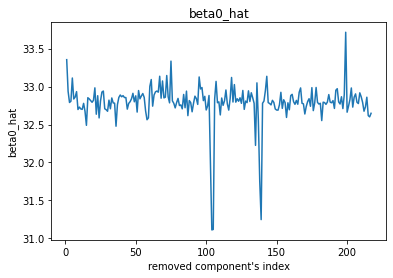

In [160]:
x1 = np.arange(1, 218,1)
y1 = beta0_hat[:,0]
fig = plt.figure()
pic1= plt.plot(x1, y1)
plt.title('beta0_hat')
plt.xlabel("removed component's index")
plt.ylabel('beta0_hat')
fig.show()

<ipython-input-161-7612924b9735>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


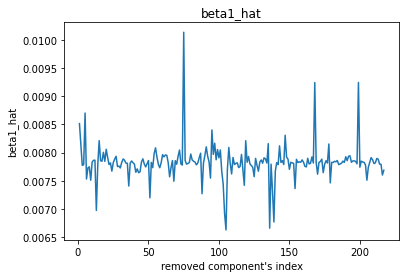

In [161]:
x2 = np.arange(1, 218,1)
y2 = beta1_hat[:,0]
fig = plt.figure()
pic2= plt.plot(x2, y2)
plt.title('beta1_hat')
plt.xlabel("removed component's index")
plt.ylabel('beta1_hat')
fig.show()

<ipython-input-162-1ff6db08a52b>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


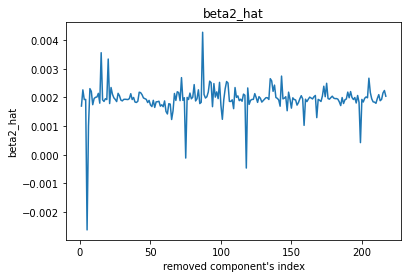

In [162]:
x3 = np.arange(1, 218,1)
y3 = beta2_hat[:,0]
fig = plt.figure()
pic3= plt.plot(x3, y3)
plt.title('beta2_hat')
plt.xlabel("removed component's index")
plt.ylabel('beta2_hat')
fig.show()

<ipython-input-163-db3c95f3b510>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


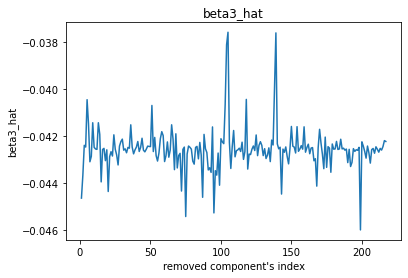

In [163]:
x4 = np.arange(1, 218,1)
y4 = beta3_hat[:,0]
fig = plt.figure()
pic4= plt.plot(x4, y4)
plt.title('beta3_hat')
plt.xlabel("removed component's index")
plt.ylabel('beta3_hat')
fig.show()

From the plots above, we may find that the estimates are relatively stable, which means the estimate changes little without any record. So we may conclude that one individual record is not that inportant to the estimate precision of Betas, however, when it comes to the whole record, the inportance is obvious.